# Homework Scratch Work

676
Radiology                      526
Cardiovascular                  70
Neurology                       20
Gastroenterology & Urology      11
Hematology                      10
Ophthalmic                       9
Clinical Chemistry               6
Anesthesiology                   5
General And Plastic Surgery      5
Microbiology                     5
General Hospital                 3
Ear Nose & Throat                2
Pathology                        1
Obstetrics And Gynecology        1
Orthopedic                       1
Dental                           1
Name: Panel (Lead), dtype: int64


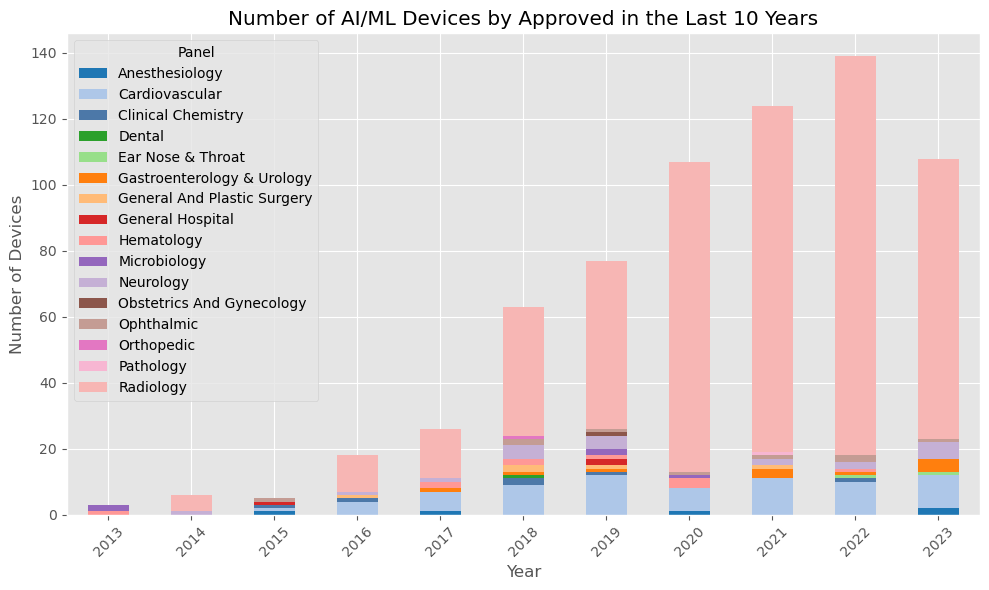

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../AI.csv", header=None)
# Set the first row as the header
df.columns = df.iloc[1]

# Drop the first row
df = df.drop(df.index[1])
df = df.drop(df.index[0])
df['Date of Final Decision'] = pd.to_datetime(df['Date of Final Decision'])
df['Year'] = df['Date of Final Decision'].dt.year
df = df[df['Year'] >= 2013]
print(len(df))

print(df["Panel (Lead)"].value_counts())
# Group by year and panel, then count the occurrences
grouped = df.groupby(['Year', 'Panel (Lead)']).size().unstack(fill_value=0)

# Plotting
colors = [
    "#1f77b4",  # Blue
    "#aec7e8",  # Light Blue
    "#4c78a8",  # Steel Blue
    "#2ca02c",  # Green
    "#98df8a",  # Light Green
    "#ff7f0e",  # Orange
    "#ffbb78",  # Light Orange
    "#d62728",  # Red
    "#ff9896",  # Light Red
    "#9467bd",  # Purple
    "#c5b0d5",  # Light Purple
    "#8c564b",  # Brown
    "#c49c94",  # Light Brown
    "#e377c2",  # Pink
    "#f7b6d2",  # Light Pink
    "#f7b6b4"   # Gray
]

sns.set_palette(colors )
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
# grouped.plot(kind='line', figsize=(10, 6))
plt.style.use('ggplot')
plt.title('Number of AI/ML Devices by Approved in the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45)
plt.legend(title='Panel')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.7, 0.3], flip_y=0.05)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
probabilities = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Handle potential NaNs in F1 scores
f1_scores = np.nan_to_num(f1_scores)

# Find the threshold that gives the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# Print optimal threshold and F1 score
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F1 Score: {optimal_f1}")

Optimal Threshold: 0.3816187850489991
Optimal F1 Score: 0.7956989247311828


In [5]:
from sklearn.metrics import f1_score
import numpy as np

# Fake data
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])  # True labels (1 for spam, 0 for not spam)
y_pred = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # Predicted labels

# Assign higher weights to spam emails (label 1)
# Calculating prevalence for each class
prevalence_spam = np.mean(y_true == 1)
prevalence_not_spam = np.mean(y_true == 0)

# Update the sample_weight array with the prevalence
# We give weight according to the prevalence of the opposite class to balance their influence
sample_weight_prevalence = np.array([prevalence_not_spam if label == 1 else prevalence_spam for label in y_true])

print(sample_weight_prevalence)
# Calculate the F1 score with the new sample weights
f1_prevalence = f1_score(y_true, y_pred, sample_weight=sample_weight_prevalence)
f1_prevalence, prevalence_spam, prevalence_not_spam

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, sample_weight=sample_weight)
f1

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.9 0.1]


0.0

In [15]:
import numpy as np
import scipy.fftpack as fft

def sin_deriv(z, h=0.1, N=1000):
    """Approximates the first derivative of sin(z)."""
    # Create a small circle centered at z in the complex plane
    u = np.linspace(0, 2 * np.pi, N, endpoint=False)
    z_values = z + np.exp(1j * u) * h
    sin_values = np.sin(z_values)

    # Compute the discrete Fourier transform of sin(z)
    fourier_transform = fft.fft(sin_values)
    
    # Correct the Fourier coefficients for the derivative approximation
    k_values = np.fft.fftfreq(N, d=(2*np.pi/N))
    derivative_coefficients = 1j * k_values * h

    # Approximate the first derivative using the corrected coefficients
    first_derivative_approximation = np.real(fft.ifft(fourier_transform * derivative_coefficients))

    # Since the function is periodic, we can take the average as the derivative
    first_derivative = np.mean(first_derivative_approximation)

    return first_derivative

# Approximate the first derivative of sin(z) at the point z = 1 + 1j.
first_derivative = sin_deriv(1 + 1j)

# Print the result.
print(first_derivative)

-5.551115123125783e-20


In [12]:
import numpy as np
import scipy.fftpack as fft

def sin_deriv(z):
  """Approximates the first derivative of sin(z)."""
  
  # Compute the discrete Fourier transform of sin(z) on a small circle centered at z.
  h = 0.1
  N = 1000
  u = np.linspace(0, 2 * np.pi, N, endpoint=False)  # endpoint=False to avoid repeating the first point
  z_values = np.exp(1j * u) * z
  sin_values = np.sin(z_values)
  fourier_transform = fft.fft(sin_values)

  # Approximate the first derivative using the equation in the image.
  # For the first derivative, k=1 and the factorial of k is 1, so we can omit it.
  k = 1
  first_derivative = fourier_transform[k] / (h**k)

  return first_derivative

# Approximate the first derivative of sin(z) at the point z = 1 + i.
z = 1 + 1j  # Using 1j as the imaginary unit
first_derivative = sin_deriv(z)

# Print the result.
print("Approximate first derivative at z = 1 + i:", first_derivative)


Approximate first derivative at z = 1 + i: (10000+10000.000000000002j)


In [14]:
import numpy as np
import scipy.fftpack as fft
import math

def sin_deriv2(z):
  """Approximates the second derivative of sin(z)."""

  # Compute the discrete Fourier transform of sin(z) on a small circle centered at z.
  h = 0.1
  N = 1000
  u = np.linspace(0, 2 * np.pi, N)
  z_values = np.exp(1j * u) * (1 + i + h)
  sin_values = np.sin(z_values)
  fourier_transform = fft.fft(sin_values)

  # Approximate the second derivative using the equation in the image.
  k = 2
  second_derivative = math.factorial(k) * fourier_transform[k] / h**k

  return second_derivative

z = 1 + 1j 
# Approximate the second derivative of sin(z) at the point z = 1 + i.
second_derivative = sin_deriv2(z)

# Print the result.
print(second_derivative)


(-38.54120647746754-472.80544873816064j)


In [11]:
import numpy as np
import scipy.fftpack as fft
import math

def sin_deriv(z):
  """Approximates the first derivative of sin(z)."""

  # Compute the discrete Fourier transform of sin(z) on a small circle centered at z.
  h = 0.1
  N = 1000
  u = np.linspace(0, 2 * np.pi, N)
  z_values = np.exp(1j * u) * (1 + math.sqrt(-1) + h)
  sin_values = np.sin(z_values)
  fourier_transform = fft.fft(sin_values)

  # Approximate the first derivative using the equation in the image.
  k = 1
  first_derivative = math.factorial(k) * fourier_transform[k] / h**k

  return first_derivative

# Approximate the first derivative of sin(z) at the point z = 1 + i.
first_derivative = sin_deriv(1 + math.sqrt(-1))

# Print the result.
print(first_derivative)

ValueError: math domain error

In [5]:
from sympy import symbols, sin, exp, I, simplify
from sympy.series import fourier
from sympy.abc import z
import numpy as np

# Define the symbol for the complex variable
z = symbols('z', complex=True)

# Define the function f(z) = sin(z)
f_z = sin(z)

# Calculate the Fourier series expansion of sin(z) in the disc |z| < r centered at 0
# We will use a finite number of terms for the approximation
# In this context, we will use the symbolic variable 'z' to represent e^(i*theta)
r = symbols('r', real=True, positive=True)  # Radius of the circle
n_terms = 1000  # Number of terms to include in the Fourier series expansion

# Calculate the Fourier series expansion
fourier_series = fourier.fourier_series(f_z, (z, -r, r)).truncate(n=n_terms)

# Now we want to evaluate the discrete Fourier transform (DFT) of the sequence f(h*w), where w = e^(2*pi*I/n)
# and h is the step size. Let's assume n=number of points on the boundary of the circle, and h=2*pi/n

# Number of points on the boundary of the circle
n_points = 20
h = 2 * np.pi / n_points  # Step size

# Calculate the values of f(z) on the boundary of the circle
w_values = np.exp(2j * np.pi * np.arange(n_points) / n_points)
f_values = np.sin(w_values * h)

# Perform the discrete Fourier transform (DFT) of the sequence f(h*w)
# We use the FFT algorithm for efficiency
f_dft = np.fft.fft(f_values)

# We need to calculate b_k - a_k*h^k for 0 ≤ k ≤ n - 1
# Since we are working with sin(z), the coefficients a_k are the coefficients of the Fourier series of sin(z)
# We will extract the coefficients from the symbolic Fourier series

# Extract the coefficients a_k from the symbolic Fourier series
a_k = [fourier_series.coeff(z, k) for k in range(n_terms)]

# Now we calculate b_k - a_k*h^k for each term
b_k_minus_a_k_h_k = [f_dft[k] - a_k[k]*h**k for k in range(n_terms)]

# The derivative approximation is then given by f'(0) = k * a_k
# However, since we have the DFT, we need to normalize it by 1/n_points to get the coefficients
derivative_approximation = sum(k * (b_k_minus_a_k_h_k[k] / n_points) for k in range(1, n_terms))

# The actual derivative of sin(z) at z=0
actual_derivative = f_z.diff(z).subs(z, 0)

# Display the actual derivative and the approximate derivative
simplify(derivative_approximation), actual_derivative


IndexError: index 20 is out of bounds for axis 0 with size 20

In [2]:
import networkx as nx

def create_grid_network(rows, cols):
    """
    Create a grid-like network with specified rows and cols.
    Each node except those on the boundary has three neighbors.
    """
    G = nx.grid_2d_graph(rows, cols)
    
    # Removing edges to make sure each node has 3 neighbors (except boundary nodes)
    for i in range(rows):
        for j in range(cols):
            if (i + j) % 2 == 0 and (i, j) in G:
                neighbors = list(G.neighbors((i, j)))
                if len(neighbors) > 1:
                    G.remove_edge((i, j), neighbors[-1])
    
    return G

def simulate_flow(G, start_node):
    """
    Simulate the flow of material in the network.
    The flow alternates direction and cannot immediately return to the previous node.
    """
    current_node = start_node
    previous_node = None
    visited = set([current_node])
    path = [current_node]

    while True:
        neighbors = [n for n in G.neighbors(current_node) if n != previous_node]
        
        # If there's no way to go, break (should not happen in a proper grid)
        if not neighbors:
            break

        # Choose the next node - alternating the direction
        next_node = neighbors[0] if previous_node is None or neighbors[0] != path[-2] else neighbors[-1]

        if next_node == start_node:
            # Flow has returned to the starting node
            return path, True

        previous_node, current_node = current_node, next_node
        path.append(current_node)
        visited.add(current_node)

    return path, False

# Create a grid network and simulate the flow
grid_network = create_grid_network(5, 5)
flow_path, returns_to_start = simulate_flow(grid_network, (0, 0))

flow_path, returns_to_start



([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)], False)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lines
x = np.linspace(0, 5, 100)
y1 = 1.5 - 0.5*x  # x1 + 2x2 = 3
y2 = 5 - 2*x  # 2x1 + x2 = 5

# Plot the lines
plt.plot(x, y1, label='x1 + 2x2 = 3')
plt.plot(x, y2, label='2x1 + x2 = 5')

# Fill feasible region
x_fill = [0, 2, 1.25]
y_fill = [0, 1.5, 2]
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.3, label='Feasible Region')

# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.title('Feasible Region Plot')

# Show plot
plt.show()

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


LoadError: MethodError: no method matching zeros(::Vector{Float64})
[0mClosest candidates are:
[0m  zeros([91m::Type{T}[39m, [91m::Union{Integer, AbstractUnitRange}...[39m) where T at ~/.julia/juliaup/julia-1.7.3+0.x64/share/julia/base/array.jl:521
[0m  zeros([91m::Tuple{Vararg{Union{Integer, AbstractUnitRange}}}[39m) at ~/.julia/juliaup/julia-1.7.3+0.x64/share/julia/base/array.jl:522
[0m  zeros([91m::Type{T}[39m, [91m::Tuple{}[39m) where T at ~/.julia/juliaup/julia-1.7.3+0.x64/share/julia/base/array.jl:529
[0m  ...

In [5]:
function lamberts_equation(x, initial_guess; tolerance=1e-10, max_iterations=100)
    w_n = initial_guess

    for i in 1:max_iterations
        numerator = w_n + (x / (w_n * exp(w_n)))
        denominator = w_n + 1
        w_n_plus_1 = w_n * (numerator / denominator)

        if abs(w_n_plus_1 - w_n) < tolerance
            break
        end

        w_n = w_n_plus_1
    end

    return w_n
end

# Example usage
x = 5.0  # Example value for x
initial_guess = 1  # Example initial guess for w
solution = lamberts_equation(x, initial_guess)
println("Solution to x = $x: w=$solution.")


Solution to x = 5.0: w=1.3267246653222065.


In [4]:
import Pkg; Pkg.add("Roots")
using Roots

# Define the polynomial function
function func(coefficients, x)
    result = zero(x)
    for (i, coeff) in enumerate(coefficients)
        result += coeff * x^(i-1)
    end
    return result
end

# Define the derivative of the polynomial function
function func_derivative(coefficients, x)
    result = zero(x)
    for (i, coeff) in enumerate(coefficients[2:end])
        result += i * coeff * x^(i-1)
    end
    return result
end

# Implement Newton's method for any polynomial function
function newton_method(coefficients, initial_guess; tolerance=1e-5, max_iterations=100)
    x = initial_guess
    for _ in 1:max_iterations
        x_next = x - func(coefficients, x) / func_derivative(coefficients, x)
        if abs(x_next - x) < tolerance
            break
        end
        x = x_next
    end
    return x
end

# Test the method with an initial guess and coefficients of the polynomial
coefficients = [5, 0, -2, 1]  # Coefficients of the polynomial 5x^3 - 2x + 1
initial_guess = 2.0
root = newton_method(coefficients, initial_guess)
println("Approximate root using Newton's method: ", root)

# Verify the result using fzero from the Roots package
fzero_root = fzero(x -> func(coefficients, x), initial_guess)
println("Root obtained using fzero: ", fzero_root)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


Approximate root using Newton's method: -1.241896591850117
Root obtained using fzero: -1.2418965630344798


#### ch2 problem 6

In [13]:
function set_union(x::Vector{Int}, y::Vector{Int})
    union_set = Set{Int}(x)
    for elem in y
        push!(union_set, elem)
    end
    return sort(collect(union_set))
end

function set_intersection(x::Vector{Int}, y::Vector{Int})
    intersection_set = Set{Int}()
    for elem in x
        if elem in y
            push!(intersection_set, elem)
        end
    end
    return sort(collect(intersection_set))
end

function set_difference(x::Vector{Int}, y::Vector{Int})
    difference_set = Set{Int}(x)
    for elem in y
        delete!(difference_set, elem)
    end
    return sort(collect(difference_set))
end

# Example usage:
x = [1, 2, 3, 4, 5]
y = [3, 4, 5, 6, 7]
union_result = set_union(x, y)
intersection_result = set_intersection(x, y)
difference_result = set_difference(x, y)

println("Union: ", union_result)
println("Intersection: ", intersection_result)
println("Set Difference: ", difference_result)

Union: [1, 2, 3, 4, 5, 6, 7]
Intersection: [3, 4, 5]
Set Difference: [1, 2]


HW1 problem 4

In [15]:
function find_closest_pair(arr::Vector{Int}, c::Int)
    if length(arr) < 2
        return (0, 0)  # Not enough elements for a pair
    end
    
    left, right = 1, length(arr)
    closest_diff = abs(arr[left] + arr[right] - c)
    closest_pair = (arr[left], arr[right])
    
    while left < right
        current_diff = abs(arr[left] + arr[right] - c)
        if current_diff < closest_diff
            closest_diff = current_diff
            closest_pair = (arr[left], arr[right])
        end
        
        if arr[left] + arr[right] < c
            left += 1
        else
            right -= 1
        end
    end
    
    return closest_pair
end

# Example usage:
arr = [1, 3, 5, 10, 12, 20]
c = 12
result = find_closest_pair(arr, c)
println("Closest pair to $c is $result")

Closest pair to 12 is (1, 12)


# HW1 Problem 5

In [9]:
function fast_tan(x)
    # Check if x is close to multiples of π
    if abs(x) % π ≈ 0
        return 0.0
    end

    # Reduce the angle to the range (-π/2, π/2)
    x = mod(x + π/2, π) - π/2

    # Use the Taylor series approximation for small x
    if abs(x) < 0.1
        x_cubed = x^3
        return x + x_cubed * (1/3 + x_cubed * (2/15 + x_cubed * 17/315))
    end

    # Calculate tan(x) using the identity tan(2x)
    tan_half_x = fast_tan(x / 2)
    return 2 * tan_half_x / (1 - tan_half_x^2)
end

# Example usage:
x = 1.0
result = fast_tan(x)
println("tan($x) ≈ $result")

tan(1.0) ≈ 1.5574012055538191


In [7]:
function find_pythagorean_triples(x)
    # Replace the entries of x with their squares and sort the result
    squares = sort(x .^ 2)
    n = length(squares)
    
    triples = []
    
    # Iterate through the sorted list of squares
    for i in 1:n
        for j in (i + 1):n
            # Calculate the sum of two squares
            sum_of_squares = squares[i] + squares[j]
            
            # Check if the sum is in the list of squares
            if sum_of_squares in squares
                # Find the corresponding square root values
                a = int(sqrt(squares[i]))
                b = int(sqrt(squares[j]))
                c = int(sqrt(sum_of_squares))
                
                # Add the Pythagorean triple to the result
                push!(triples, (a, b, c))
            end
        end
    end
    
    return triples
end

# Example usage:
x = [3, 4, 5, 6, 7, 8, 10]
triples = find_pythagorean_triples(x)
println("Pythagorean Triples in x: ", triples)

LoadError: UndefVarError: int not defined

In [4]:
# Define coefficients in single-precision
a = Float32(1.0)
b = Float32(-2.0)
c = Float32(1.0)

# Calculate discriminant
discriminant = b^2 - 4*a*c

# Calculate roots using standard quadratic formula
root1 = (-b + sqrt(discriminant)) / (2*a)
root2 = (-b - sqrt(discriminant)) / (2*a)

println("Root 1: $root1")
println("Root 2: $root2")

Root 1: 1.0
Root 2: 1.0


#### HW1 Problem 4

In [2]:
function dedekind_algorithm(c, initial_guess, tolerance=1e-12, max_iterations=1000)
    x = initial_guess
    for i in 1:max_iterations
        x_next = x * (x^2 + 3c) / (3 * x^2 + c)
        if abs(x_next - x) < tolerance
            return x_next
        end
        x = x_next
    end
    error("Dedekind's algorithm did not converge within the given iterations.")
end

# Define the complex number for which you want to extract the principal cubic root.
c = complex(1.0, 2.0)  # You can change the values as needed.

# Define an initial guess for the root (x0).
initial_guess = 1.0

# Call Dedekind's algorithm to find the principal cubic root.
cubic_root = dedekind_algorithm(c, initial_guess)

# Verify the result by cubing the cubic root.
verification = cubic_root^3

println("Original complex number (c): ", c)
println("Principal cubic root (Dedekind's algorithm): ", cubic_root)
println("Verification (cubic root cubed): ", verification)

Original complex number (c): 1.0 + 2.0im
Principal cubic root (Dedekind's algorithm): 1.2720196495140692 + 0.7861513777574234im
Verification (cubic root cubed): -0.30028310600077734 + 3.3301906767855627im
